In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc


In [2]:
text=pd.read_excel('New_dataset.xlsx')


In [3]:
text["Sentence"].head()


0    i m already feeling somewhat strange given tha...
1    i pm hehehe anyasimbi pm takes a nap sweetie p...
2    a boy phoned me at night and wanted to talk to...
3    i a feeling of curious satisfaction to be on t...
4                a breakup with someone i really liked
Name: Sentence, dtype: object

In [4]:
# CLeaning the data from custom class
from DataClean import DataCleaner
cleanData = DataCleaner()
sentences , emotions = cleanData.cleanData(text["Sentence"]) , text["Emotion"]


In [5]:
#Creating a 80-20 test split
from sklearn.model_selection import train_test_split
Sen_train, Sen_test, Em_train, Em_test = train_test_split( sentences , emotions , test_size=0.2, random_state=42, shuffle=True,stratify=emotions)


In [6]:
# Using Multinomial NM to fit the TF-IDF vector by using only selected stop words
from DataClean import ModelAnalysis
from replacers import GetStopWords
stopwords = GetStopWords()
modelanalysis = ModelAnalysis()
model_NB = MultinomialNB()
modelFit , vectorizer = modelanalysis.VectAndTrans(Sen_train,Em_train,model_NB,stopwords.getStopWords())


In [7]:
predictedModel= modelanalysis.PredictEmotion(vectorizer,Sen_test,modelFit)


In [8]:
from DataClean import PerformanceMetrices
modelMetrices = PerformanceMetrices()
print(modelMetrices.Accuracy(predictedModel,Em_test))
print(modelMetrices.Confusion_matrix(predictedModel,Em_test))


0.8991666666666667
[[1096   35   15   48    5]
 [  44 1015   19   41   36]
 [  18   13 1094   33   16]
 [  28   25   33 1055    8]
 [  14  112   39   23 1135]]


In [9]:
from sklearn.metrics import precision_recall_fscore_support
precision , recall , fbetascore, support = precision_recall_fscore_support(Em_test, predictedModel, average='macro')


In [10]:
print("Precision : " + str(precision) +"\nRecall : " + str(recall) + '\nFScore : ' + str(fbetascore) )


Precision : 0.9001656605502492
Recall : 0.8991666666666667
FScore : 0.899067630346923


In [11]:
# Using the label binarizer to fit the transform the classes for prediction
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
lb = preprocessing.LabelBinarizer()
lb.fit(Em_test)
y_test = lb.transform(Em_test)
y_pred = lb.transform(predictedModel)
print("ROC score : " + str(roc_auc_score(y_test, y_pred)))


ROC score : 0.9369791666666666


In [12]:
#Reference : https://stackoverflow.com/questions/45332410/sklearn-roc-for-multiclass-classification
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


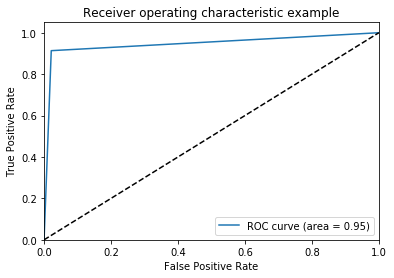

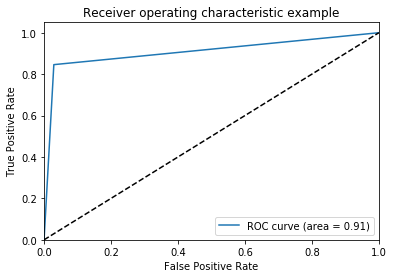

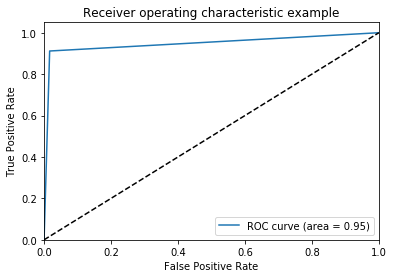

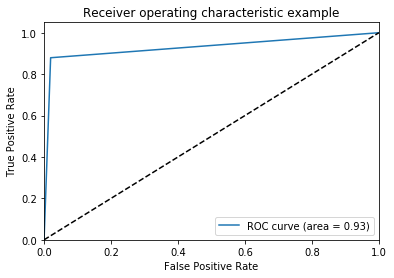

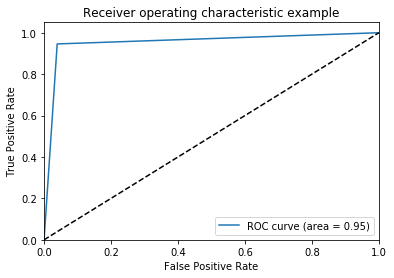

In [14]:
import matplotlib.pyplot as plt
# Plot of a ROC curve for a specific class
for i in range(5):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# #%%
# sentences_test = pd.read_csv('Emotion Phrases.csv')
# sentences_test


# #%%
# sentenceList = pd.Series(v[0] for v in sentences_test)
# sentenceList


# #%%
# type(sentences_test)


# #%%
# from DataClean import DataCleaner
# cleanData = DataCleaner()
# sentences  = cleanData.cleanData(sentences_test["Sentence"])


# #%%
# sentences


# #%%
# predictedModel= modelanalysis.PredictEmotion(vectorizer,sentences,modelFit)


# #%%
# predictedModel


# #%%
# from DataClean import PerformanceMetrices
# modelMetrices = PerformanceMetrices()
# print(modelMetrices.Accuracy(predictedModel,sentences_test["Emotion"]))